In [483]:
import imp
import tools
imp.reload(tools)

<module 'tools' from '/Users/marat/Documents/DS/git/tools.py'>

### Init parameters

In [488]:
# Scenario = ['Rent&Buy']
# Scenario = ['Early Repayment Mortgage', 'Standard Mortgage']
Scenario = ['Standard Mortgage', 'Rent&Buy', 'Only Renting', 'Early Repayment Mortgage']
# Income = [200000, 300000, 400000]
Income = [200000]
IYearGrowth = [0.08]
Expenses = [50000]
EYearGrowth = [0.06]
SavingsInitial = [100000]
PropertyPrice = [10000000]
PPYearGrowth = [0.04]
# PPYearGrowth = [0.01, 0.03, 0.05, 0.1]
Years = [11]
DepositRate = [0.05]
Rent = [50000]
RYearGrowth = [0.08]
MortgageRate = [0.1]
MortgageTermMonths = [120]
isDetailed = True

output_table = tools.execute_simulations(Scenario,
        Income,
        IYearGrowth,
        Expenses,
        EYearGrowth,
        SavingsInitial,
        PropertyPrice,
        PPYearGrowth,
        Years,
        DepositRate,
        Rent,
        RYearGrowth,
        MortgageRate,
        MortgageTermMonths
        )

### Capital at the end

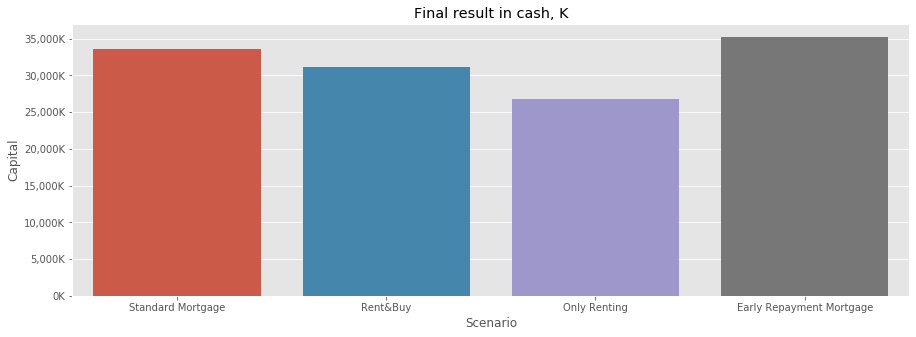

In [489]:
fig = plt.subplots(figsize=(15, 5))
c1 = sns.barplot(data=output_table, x='Scenario', y='Capital');
c1.set_title('Final result in cash, K')
ylabels = ['{:,.0f}'.format(x) + 'K' for x in c1.get_yticks()/1000]
c1.set_yticklabels(ylabels);

### Dependecies

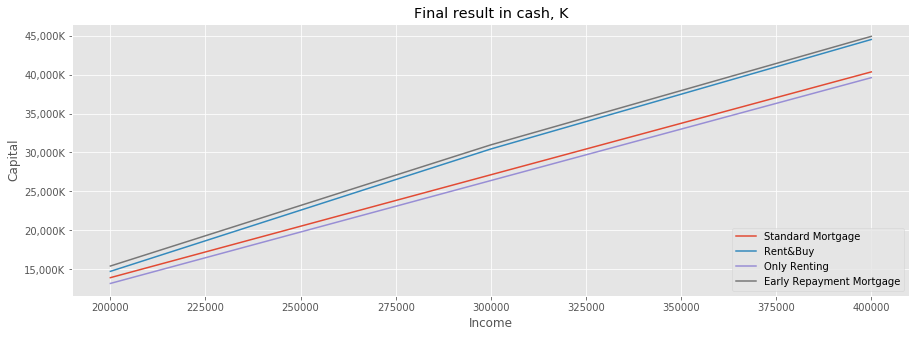

In [480]:
fig = plt.subplots(figsize=(15, 5))

for s in Scenario:
    c1 = sns.lineplot(data=output_table[output_table['Scenario']==s], x='Income', y='Capital', label=s);

c1.set_title('Final result in cash, K')
ylabels = ['{:,.0f}'.format(x) + 'K' for x in c1.get_yticks()/1000]

c1.set_yticklabels(ylabels);
c1.legend(loc='lower right');

### Factor analysis

In [ ]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor()
co1 = output_table['Scenario']=='Early Repayment Mortgage'
dtr.fit(output_table[co1].drop(['Capital', 'Scenario'], axis=1), output_table[co1]['Capital'])
pd.DataFrame({'vars': list(output_table[co1].drop(['Capital', 'Scenario'], axis=1)), 'imp': dtr.feature_importances_}).sort_values(by='imp', ascending=False)